# [TensorFlow Wide & Deep Learning Tutorial](https://www.tensorflow.org/tutorials/wide_and_deep)

Wide & Deep Learning.. 암걸림  
google 이놈들이 만들어 놓고 관리를 안해서  
* 하위패키지 업데이트 해놓고 상위 라이브러리에 적용 안함   
그리고 이거 사용하는 사람들이 적어서 민간예제도 거의 없음  
* python2사용자들이 많아서 python3로 바꾸는데 애먹음 (필자 컴맹임)   
그래도 사용은 해본다.

---

일단 Wide & Deep Learning 를 설명하기전에 그림으로 보면 한번에 이해가 된다.

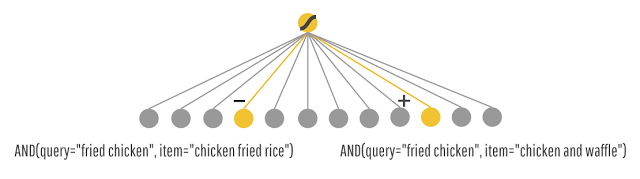

In [1]:
from IPython.display import Image
Image('images/The Wide model.png')

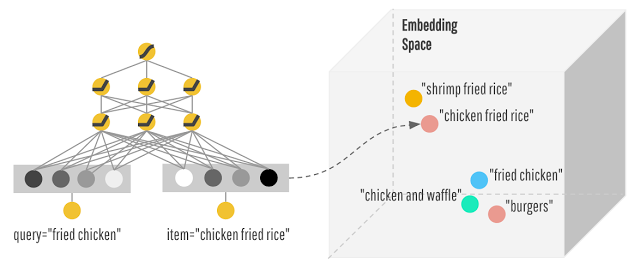

In [2]:
Image('images/The Deep model.png')

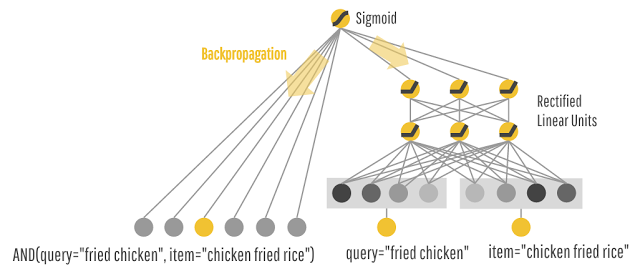

In [3]:
Image('images/Combining Wide and Deep models.png')

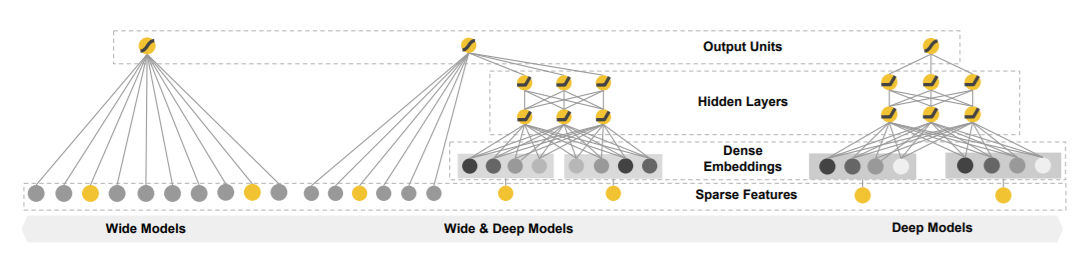

In [4]:
Image('images/wide_n_deep.png')

위 그림은 다음을 설명한다.
* wide 모델(sparse feature 와 변환법의 로지스틱 회귀분석)  
* deep 모델(embedding layer와 여러 hidden layer들의 feed-forward 신경망) 

wide 부분에 대한 features 선택하는 기준
* 사용하길 원하는 sparse base column 과 crossed column 들을 선택  
deep 부분에 대한 features 선택하는 기준
* 연속된 열, 각 분류 열의 embedding dimension, 그리고 hidden layer 크기를 선택  
이들을 Wide & Deep 모델에 적용한다(DNNLinearCombinedClassifier)

---

### 자세한 사항은 paper 참조 [Wide & Deep Learning for Recommender Systems](https://arxiv.org/pdf/1606.07792.pdf) (Heng-Tze Cheng et al.)

해당 모델은 google의 Recommender system을 위해서 만들어진 모형같은데  
일반적인 추천시스템들의 단점을 서로 보완한 모형이라고 한다.  

Wide & Deep
* wide의 기능 : 암기(memorization), 자주 발행하는 직접 관련성이 높은 아이템(항목)을 학습하여 추천한다.
* deep의 기능 : 일반화(generalization), 과거에는 없었거나 거의 없었던 새로운 항목(조합)을 추천하여 다양성을 개선한다.



다음을 통하여 순위를 매긴다. score : P(y|x)
* user feature  (고객)
* contextual feature  (관련된)
* impression feature  (일반적인)

### Ranking model for memorization and generalization

logistic regression은 cross-product transformation 을 통해서 memorize를 할 수 있다.  
DNN은 dense embedding vector를 통해서 generalize 할 수 있다.

$$$\Phi_k(x) = \prod_{i=1}^{d} x_i^{c_{k, i}}$ $$
$$P(Y=1|x) = \sigma \left ( W_{wide}^T [x, \Phi(x)] + W_{deep}^T a^(l_f) + b \right )$$

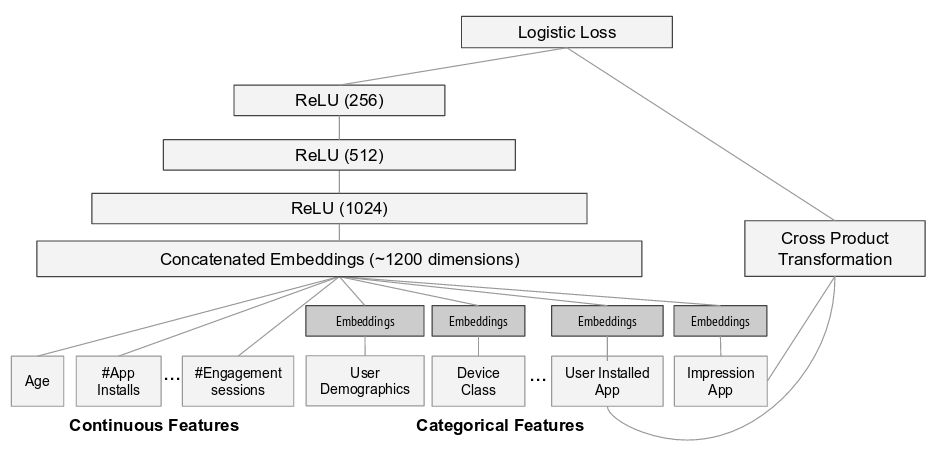

In [5]:
Image('images/WND structure.png')

논문에 따르면
* Wide 와 Deep 의 모든 매개변수를 동시에 최적화 한다.
* Wide 와 Deep 각각의 모형을 크게하여 앙상블을 해보아라
* Wide 는 사실 Deep의 약점만 보완하면 된다. (?) 
* Wide 와 Deep 은 동시에 backpopagating gradients를 한다. mini batch stochastic opimization을 사용해서
* 해당 모형은 L1 regularization을 이용하고 AdaGrad를 사용한다.

논문에 의하면 모형을 App 추천시스템에 적용해본 결과  
* 대조군 Wide
* 실험군 Deep 과 Joint(Wide & Deep)   

Deep 은 2.9%, Wide&Deep 은 3.9% 사용량이 증가하였다.  
이는 통계적으로 유의하다고 한다. (자기들 말로)

## [Reading The Census Data](https://archive.ics.uci.edu/ml/datasets/Census+Income)

In [2]:
# 임시 파일을 만들어 쓸떄 유용한 라이브러리
import tempfile

# 웹상의 문서나 파일을 가져올때 사용하는 라이브러리
from urllib.request import urlretrieve

In [3]:
# 임시 파일을 생성.
train_file = tempfile.NamedTemporaryFile()
test_file = tempfile.NamedTemporaryFile()

# urlretrieve(URL주소, 저장할 이름) : 다운로드할 파일이 있는 곳에서 URL주소에서 지정함
urlretrieve("http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data", train_file.name)
urlretrieve("http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.test", test_file.name)

('/tmp/tmp54_t_4_n', <http.client.HTTPMessage at 0x7efcddd367f0>)

In [4]:
# 컬럼 노가다스

# 15개 / fnlwgt는 안씀
COLUMNS = ["age", "workclass", "fnlwgt",
           "education", "education_num", "marital_status",
           "occupation", "relationship", "race",
           "gender", "capital_gain", "capital_loss",
           "hours_per_week", "native_country", "income_bracket"]

# 범주형 8개
CATEGORICAL_COLUMNS = ["workclass", "education", "marital_status",
                       "occupation", "relationship", "race",
                       "gender", "native_country"]

# 5개
CONTINUOUS_COLUMNS = ["age", "education_num", "capital_gain",
                      "capital_loss", "hours_per_week"]

In [5]:
import pandas as pd

In [6]:
df_train = pd.read_csv(train_file, names=COLUMNS, skipinitialspace=True)
df_test = pd.read_csv(test_file, names=COLUMNS, skipinitialspace=True, skiprows=1)

In [7]:
# 1, 0
LABEL_COLUMN = 'label'

# 소득 50000불 기준 2진분류
df_train[LABEL_COLUMN] = (df_train['income_bracket'].apply(lambda x: '>50K' in x)).astype(int)
df_test[LABEL_COLUMN] = (df_test['income_bracket'].apply(lambda x: '>50K' in x)).astype(int)



In [8]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


In [9]:
list(df_train.columns.values)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_bracket',
 'label']

## Define Base Feature Columns

In [10]:
import tensorflow as tf

In [11]:
# 범주형 
"""
범주형 자료에서 각 class를 알고있는 겅우 sparse_column_with_keys 로 할당
차례대로 0, 1, ... 순으로 키값을 가짐.
각 항목을 모른다면 sparse_column_with_hash_bucket를 사용해서 자동 할당
"""

gender = tf.contrib.layers.sparse_column_with_keys(column_name="gender", keys=["Female", "Male"])

race = tf.contrib.layers.sparse_column_with_keys(column_name="race", keys=[
        "Amer-Indian-Eskimo", "Asian-Pac-Islander", "Black", "Other", "White"])

education = tf.contrib.layers.sparse_column_with_hash_bucket("education", hash_bucket_size=1000)

relationship = tf.contrib.layers.sparse_column_with_hash_bucket("relationship", hash_bucket_size=100)

workclass = tf.contrib.layers.sparse_column_with_hash_bucket("workclass", hash_bucket_size=100)

occupation = tf.contrib.layers.sparse_column_with_hash_bucket("occupation", hash_bucket_size=1000)

native_country = tf.contrib.layers.sparse_column_with_hash_bucket("native_country", hash_bucket_size=1000)

In [12]:
# 연속형 
# 버킷은 연속적인 컬럼을 카테고리성 컬럼으로 변환한다.
age = tf.contrib.layers.real_valued_column("age")

age_buckets = tf.contrib.layers.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

education_num = tf.contrib.layers.real_valued_column("education_num")

capital_gain = tf.contrib.layers.real_valued_column("capital_gain")

capital_loss = tf.contrib.layers.real_valued_column("capital_loss")

hours_per_week = tf.contrib.layers.real_valued_column("hours_per_week")

## The Wide Model: Linear Model with Crossed Feature Columns

In [13]:
# crossed_column 이게 하이라이트
# feature cross 라고 불리는 건데 회귀분석에서 교호작용과 비슷하다.
wide_columns = [
    
    gender, native_country, education, occupation, workclass, relationship, age_buckets,
    tf.contrib.layers.crossed_column([education, occupation], hash_bucket_size=int(1e4)),
    tf.contrib.layers.crossed_column([native_country, occupation], hash_bucket_size=int(1e4)),
    tf.contrib.layers.crossed_column([age_buckets, education, occupation], hash_bucket_size=int(1e6))]

In [14]:
wide_columns

[_SparseColumnKeys(column_name='gender', is_integerized=False, bucket_size=None, lookup_config=_SparseIdLookupConfig(vocabulary_file=None, keys=('Female', 'Male'), num_oov_buckets=0, vocab_size=2, default_value=-1), combiner='sum', dtype=tf.string),
 _SparseColumnHashed(column_name='native_country', is_integerized=False, bucket_size=1000, lookup_config=None, combiner='sum', dtype=tf.string),
 _SparseColumnHashed(column_name='education', is_integerized=False, bucket_size=1000, lookup_config=None, combiner='sum', dtype=tf.string),
 _SparseColumnHashed(column_name='occupation', is_integerized=False, bucket_size=1000, lookup_config=None, combiner='sum', dtype=tf.string),
 _SparseColumnHashed(column_name='workclass', is_integerized=False, bucket_size=100, lookup_config=None, combiner='sum', dtype=tf.string),
 _SparseColumnHashed(column_name='relationship', is_integerized=False, bucket_size=100, lookup_config=None, combiner='sum', dtype=tf.string),
 _BucketizedColumn(source_column=_RealValue

## The Deep Model: Neural Network with Embeddings

In [18]:
for i in CATEGORICAL_COLUMNS:
    print(df_train[[i]].apply(pd.value_counts))
    print("-----------------------------------")
    print(i, "[class 갯수] :", df_train[[i]].apply(pd.value_counts).count()[0])
    print("-----------------------------------")

                  workclass
Private               22696
Self-emp-not-inc       2541
Local-gov              2093
?                      1836
State-gov              1298
Self-emp-inc           1116
Federal-gov             960
Without-pay              14
Never-worked              7
-----------------------------------
workclass [class 갯수] : 9
-----------------------------------
              education
HS-grad           10501
Some-college       7291
Bachelors          5355
Masters            1723
Assoc-voc          1382
11th               1175
Assoc-acdm         1067
10th                933
7th-8th             646
Prof-school         576
9th                 514
12th                433
Doctorate           413
5th-6th             333
1st-4th             168
Preschool            51
-----------------------------------
education [class 갯수] : 16
-----------------------------------
                       marital_status
Married-civ-spouse              14976
Never-married                   10683
Div

In [19]:
deep_columns = [
  tf.contrib.layers.embedding_column(workclass, dimension=5),
  tf.contrib.layers.embedding_column(education, dimension=8),
  tf.contrib.layers.embedding_column(gender, dimension=2),
  tf.contrib.layers.embedding_column(relationship, dimension=3),
  tf.contrib.layers.embedding_column(native_country, dimension=21),
  tf.contrib.layers.embedding_column(occupation, dimension=8),
  age, education_num, capital_gain, capital_loss, hours_per_week]

## Combining Wide and Deep Models into One

In [21]:
model_dir = tempfile.mkdtemp()
m = tf.contrib.learn.DNNLinearCombinedClassifier(
    model_dir=model_dir,
    # wide
    linear_feature_columns=wide_columns,
    # deep
    dnn_feature_columns=deep_columns,
    dnn_hidden_units=[256, 128, 64, 32, 16])

Instructions for updating:
Please set fix_global_step_increment_bug=True and update training steps in your pipeline. See pydoc for details.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_task_id': 0, '_master': '', '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_model_dir': '/tmp/tmpqgtlarjy', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f392d1c0eb8>, '_task_type': None, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 0, '_session_config': None, '_evaluation_master': '', '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_environment': 'local', '_is_chief': True}


## Training and Evaluating The Model



In [22]:
def input_fn(df):
    """이산형과 범주형 속성값이 다르므로 따로 처리해서 합치기"""
    
    # tf.constant : 상수값 만들기
    continuous_cols = {k: tf.constant(df[k].values)
                     for k in CONTINUOUS_COLUMNS}
    
    # 범주형은 0,1 값을 가지기 때문에 sparse한 데이터
    # tf.SparseTensor : 로 생성하면 된다.
    categorical_cols = {k: tf.SparseTensor(
            indices=[[i, 0] for i in range(df[k].size)], # 위치
            values=df[k].values, # 값
            dense_shape=[df[k].size, 1]) # 모양
                        for k in CATEGORICAL_COLUMNS}
    
    # 합치기
    # feature_cols = dict(continuous_cols.items() + categorical_cols.items())
    feature_cols = {**continuous_cols , **categorical_cols}

    label = tf.constant(df[LABEL_COLUMN].values)

    return feature_cols, label

In [23]:
def train_input_fn():
  return input_fn(df_train)

def eval_input_fn():
  return input_fn(df_test)

In [24]:
m.fit(input_fn=train_input_fn, steps=200)

Instructions for updating:
The default behavior of sparse_feature_cross is changing, the default
value for hash_key will change to SPARSE_FEATURE_CROSS_DEFAULT_HASH_KEY.
From that point on sparse_feature_cross will always use FingerprintCat64
to concatenate the feature fingerprints. And the underlying
_sparse_feature_cross_op.sparse_feature_cross operation will be marked
as deprecated.
Instructions for updating:
The default behavior of sparse_feature_cross is changing, the default
value for hash_key will change to SPARSE_FEATURE_CROSS_DEFAULT_HASH_KEY.
From that point on sparse_feature_cross will always use FingerprintCat64
to concatenate the feature fingerprints. And the underlying
_sparse_feature_cross_op.sparse_feature_cross operation will be marked
as deprecated.
Instructions for updating:
The default behavior of sparse_feature_cross is changing, the default
value for hash_key will change to SPARSE_FEATURE_CROSS_DEFAULT_HASH_KEY.
From that point on sparse_feature_cross will always 

DNNLinearCombinedClassifier(params={'dnn_dropout': None, 'fix_global_step_increment_bug': False, 'dnn_feature_columns': (_EmbeddingColumn(sparse_id_column=_SparseColumnHashed(column_name='workclass', is_integerized=False, bucket_size=100, lookup_config=None, combiner='sum', dtype=tf.string), dimension=5, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x7f392d1c0048>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, shared_embedding_name=None, shared_vocab_size=None, max_norm=None, trainable=True), _EmbeddingColumn(sparse_id_column=_SparseColumnHashed(column_name='education', is_integerized=False, bucket_size=1000, lookup_config=None, combiner='sum', dtype=tf.string), dimension=8, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x7f392d1c08d0>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, shared_embedding_name=None, shared_vocab_size=None, max_norm=None, trainable=True), _EmbeddingColumn(sparse_id_colum

In [43]:
df_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.,0


In [25]:
results = m.evaluate(input_fn=eval_input_fn, steps=1)

Instructions for updating:
The default behavior of sparse_feature_cross is changing, the default
value for hash_key will change to SPARSE_FEATURE_CROSS_DEFAULT_HASH_KEY.
From that point on sparse_feature_cross will always use FingerprintCat64
to concatenate the feature fingerprints. And the underlying
_sparse_feature_cross_op.sparse_feature_cross operation will be marked
as deprecated.
Instructions for updating:
The default behavior of sparse_feature_cross is changing, the default
value for hash_key will change to SPARSE_FEATURE_CROSS_DEFAULT_HASH_KEY.
From that point on sparse_feature_cross will always use FingerprintCat64
to concatenate the feature fingerprints. And the underlying
_sparse_feature_cross_op.sparse_feature_cross operation will be marked
as deprecated.
Instructions for updating:
The default behavior of sparse_feature_cross is changing, the default
value for hash_key will change to SPARSE_FEATURE_CROSS_DEFAULT_HASH_KEY.
From that point on sparse_feature_cross will always 

In [26]:
for key in sorted(results):
    print("%s: %s" % (key, results[key]))

accuracy: 0.847921
accuracy/baseline_label_mean: 0.236226
accuracy/threshold_0.500000_mean: 0.847921
auc: 0.895577
auc_precision_recall: 0.75377
global_step: 202
labels/actual_label_mean: 0.236226
labels/prediction_mean: 0.236583
loss: 0.335768
precision/positive_threshold_0.500000_mean: 0.770324
recall/positive_threshold_0.500000_mean: 0.50754


In [37]:
results.copy()

{'accuracy': 0.84792089,
 'accuracy/baseline_label_mean': 0.23622628,
 'accuracy/threshold_0.500000_mean': 0.84792089,
 'auc': 0.89557701,
 'auc_precision_recall': 0.75377011,
 'global_step': 202,
 'labels/actual_label_mean': 0.23622628,
 'labels/prediction_mean': 0.23658338,
 'precision/positive_threshold_0.500000_mean': 0.77032357,
 'recall/positive_threshold_0.500000_mean': 0.50754029}

---